In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 14.6 s


In [72]:
df = dSlow
xlcol = 'NuXL:isXL'
ls = []
for col in df.columns:
    ls.append([col])
    ls[-1].append(min(df[col]))
    ls[-1].append(max(df[col]))
    ls[-1].append(min(df.loc[df[xlcol] == 1, col]))
    ls[-1].append(max(df.loc[df[xlcol] == 1, col]))
    ls[-1].append(min(df.loc[df[xlcol] == 0, col]))
    ls[-1].append(max(df.loc[df[xlcol] == 0, col]))

df = pd.DataFrame(ls, columns = ['Col','Min Ges', 'Max Ges', 'Min XL', 'Max XL', 'Min nXL', 'Max nXL'])
colsToImputate = df.loc[(df['Min nXL'] == df['Max nXL']) & (df['Min XL'] != df['Max XL']), 'Col']
df.loc[(df['Min nXL'] == df['Max nXL']) & (df['Min XL'] != df['Max XL'])]

,Col,Min Ges,Max Ges,Min XL,Max XL,Min nXL,Max nXL
29,NuXL:tag_XLed,0,1,0,1,0.167833,0.167833
31,NuXL:tag_shifted,0.0434783,1,0.0434783,1,0.171664,0.171664
35,NuXL:marker_ions_score,0,1,0,1,0.0402636,0.0402636
36,NuXL:partial_loss_score,0,1,0,1,0.114259,0.114259
37,NuXL:pl_MIC,0.0128985,1,0.0128985,1,0.148856,0.148856
38,NuXL:pl_err,0,1,0,1,0.112142,0.112142
39,NuXL:pl_Morph,0.0563894,1,0.0563894,1,0.221414,0.221414
40,NuXL:pl_modds,7.55265e-09,1,7.55265e-09,1,0.00600803,0.00600803
41,NuXL:pl_pc_MIC,0,1,0,1,0.0347335,0.0347335
42,NuXL:pl_im_MIC,0,1,0,1,0.024988,0.024988


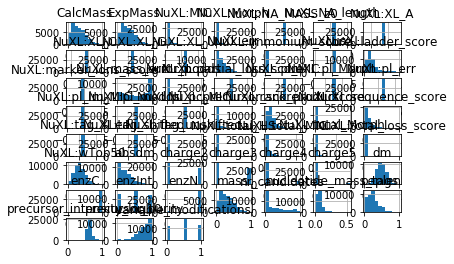

In [83]:
dSlow.loc[dSlow[xlcol] == 1, features].hist()
plt.savefig('Testologie.png', dpi = 300)

In [57]:
colsToImputate

29              NuXL:tag_XLed
31           NuXL:tag_shifted
35     NuXL:marker_ions_score
36    NuXL:partial_loss_score
37                NuXL:pl_MIC
38                NuXL:pl_err
39              NuXL:pl_Morph
40              NuXL:pl_modds
41             NuXL:pl_pc_MIC
42             NuXL:pl_im_MIC
47            NuXL:NA_MASS_z0
48             NuXL:NA_length
51                  NuXL:XL_U
52                  NuXL:XL_C
53                  NuXL:XL_G
54                  NuXL:XL_A
Name: Col, dtype: object

In [71]:
df = dSlow
for col in colsToImputate:
    df.loc[(df[xlcol] == 0), col] = np.mean(df.loc[(df[xlcol] == 1), col])
df[list(colsToImputate) + [xlcol]]

,NuXL:tag_XLed,NuXL:tag_shifted,NuXL:marker_ions_score,NuXL:partial_loss_score,NuXL:pl_MIC,NuXL:pl_err,NuXL:pl_Morph,NuXL:pl_modds,NuXL:pl_pc_MIC,NuXL:pl_im_MIC,NuXL:NA_MASS_z0,NuXL:NA_length,NuXL:XL_U,NuXL:XL_C,NuXL:XL_G,NuXL:XL_A,NuXL:isXL
15534,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
15647,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
12279,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
14073,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
14191,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
77656,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
28032,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
77841,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
78047,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0
77762,0.167833,0.171664,0.040264,0.114259,0.148856,0.112142,0.221414,0.006008,0.034733,0.024988,0.493420,0.577234,0.085732,0.412317,0.195241,0.30671,0


In [7]:
%%time

saveName = ''

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName, identsAsMetric = True)

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3671, length of negative training set: 28394


KeyboardInterrupt: 